In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier,RidgeClassifier,PassiveAggressiveClassifier,LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier

In [3]:
raw_data=pd.read_csv("Data\\train.csv")
raw_data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...,...,...
82652,@wineschach,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,84,12.0,Northern Spain,Rioja,NaN,Montecillo,Tempranillo
82653,NaN,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,85,21.0,New Mexico,New Mexico,NaN,Vivác Winery,Cabernet Sauvignon
82654,@vossroger,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,87,14.0,Beaujolais,Beaujolais-Villages,NaN,Domaine de la Madone,Gamay
82655,@vossroger,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",NaN,91,20.0,Bordeaux,Haut-Médoc,NaN,Château Beaumont,Bordeaux-style Red Blend


In [4]:
raw_test_data=pd.read_csv("Data\\test.csv")
raw_test_data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole
...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal


In [5]:
raw_data.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [6]:
train_df=raw_data.copy()

In [7]:
train_df.drop(columns=["user_name","designation","region_2"],axis=1,inplace=True)

In [8]:
train_df.isnull().sum()

country                  35
review_title              0
review_description        0
points                    0
price                  5569
province                 35
region_1              12754
winery                    0
variety                   0
dtype: int64

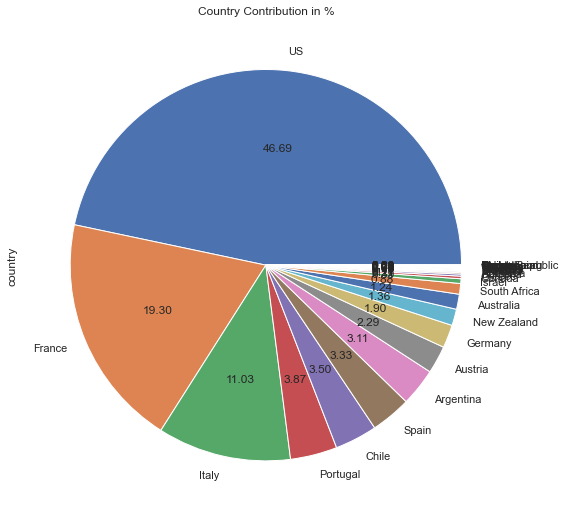

In [9]:
train_df.country.value_counts().plot(kind='pie',figsize=(14,9),autopct='%.2f')
plt.title("Country Contribution in %")
plt.show()

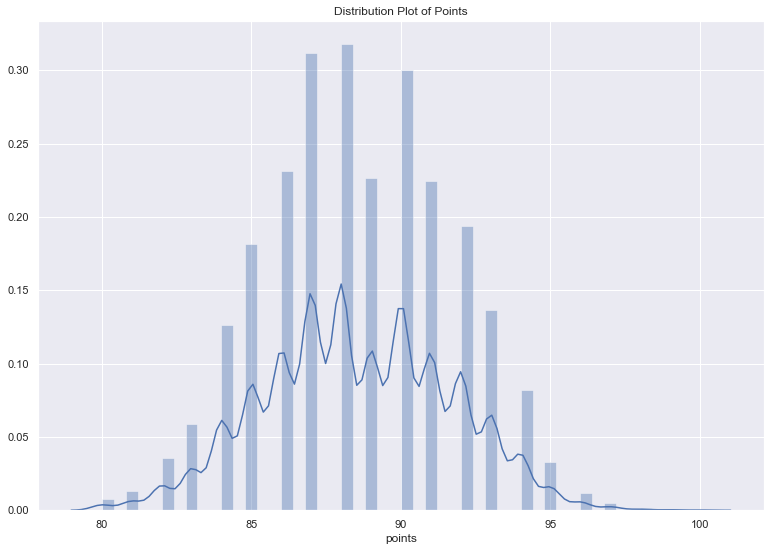

In [10]:
plt.figure(figsize=(13,9))
sns.distplot(train_df.points)
plt.title("Distribution Plot of Points")
plt.show()

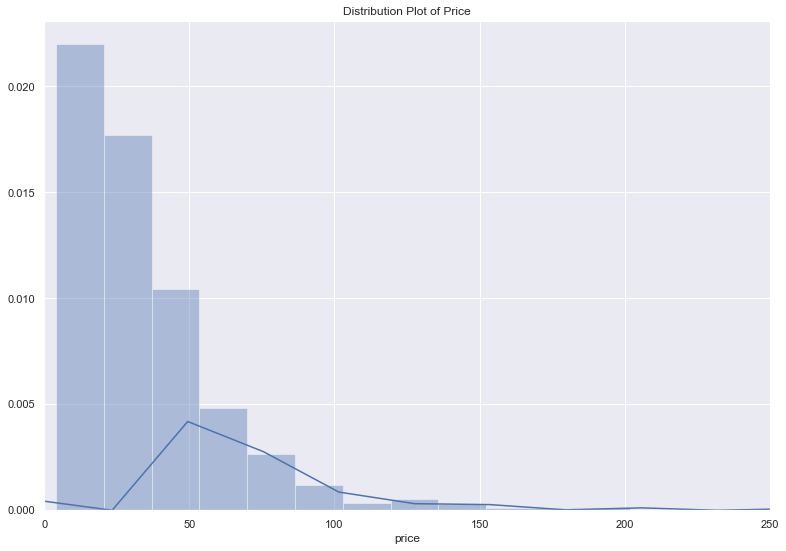

In [11]:
plt.figure(figsize=(13,9))
sns.distplot(train_df.price,bins=200).set(xlim=(0,250))
plt.title("Distribution Plot of Price" )
plt.show()

In [12]:
# Majority of Prices are below 50

In [13]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             82622 non-null  object 
 1   review_title        82657 non-null  object 
 2   review_description  82657 non-null  object 
 3   points              82657 non-null  int64  
 4   price               77088 non-null  float64
 5   province            82622 non-null  object 
 6   region_1            69903 non-null  object 
 7   winery              82657 non-null  object 
 8   variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 5.7+ MB


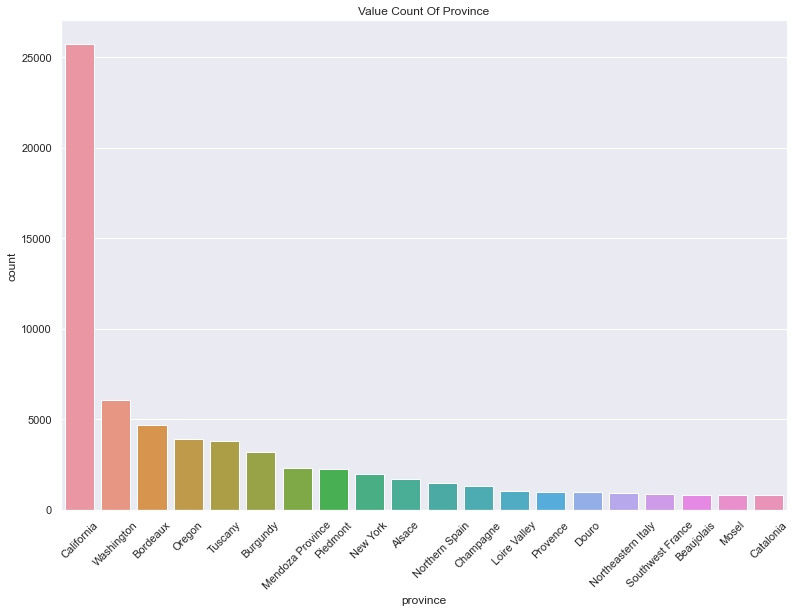

In [14]:
plt.figure(figsize=(13,9))
sns.countplot(x='province', order=train_df.province.value_counts().iloc[:20].index,data=train_df)
plt.xticks(rotation=45)
plt.title("Value Count Of Province")
plt.show()

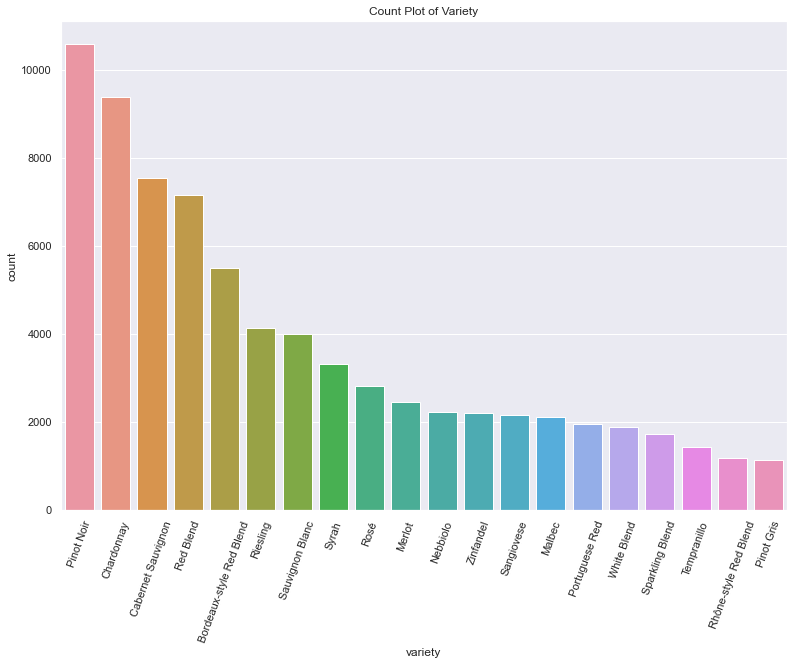

In [15]:
plt.figure(figsize=(13,9))
sns.countplot(x="variety", data=train_df,  order = train_df['variety'].value_counts().iloc[:20].index)
plt.title("Count Plot of Variety")
plt.xticks(rotation=70)
plt.show()

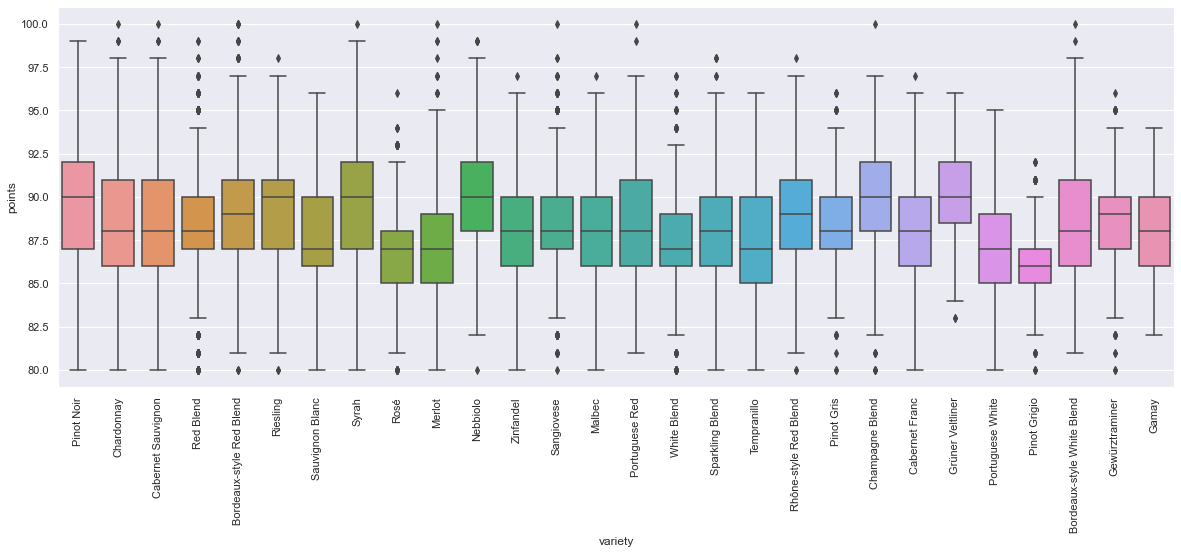

In [16]:


plt.figure(figsize = (20,7))
sns.boxplot(x='variety',y='points',data=train_df,order=train_df.variety.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [17]:
X = raw_data.review_description
y = raw_data.variety

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61992,) (20665,) (61992,) (20665,)


In [19]:
stopwords=set(stopwords.words('english'))
vect = CountVectorizer(stop_words = stopwords)
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)

In [20]:
model1=SGDClassifier()
model1.fit(X_train_vect,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy Score: 69.47011855794823


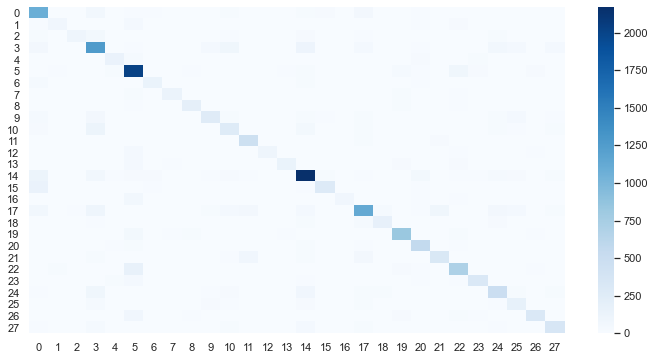

In [21]:
y_pred=model1.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

In [22]:
model2=MLPClassifier(hidden_layer_sizes=10,verbose=2,batch_size=4000,max_iter=500,early_stopping=True)
model2.fit(X_train_vect,y_train)

Iteration 1, loss = 3.34630626
Validation score: 0.088065
Iteration 2, loss = 3.20095666
Validation score: 0.163871
Iteration 3, loss = 3.05373179
Validation score: 0.195161
Iteration 4, loss = 2.91536994
Validation score: 0.215323
Iteration 5, loss = 2.78487342
Validation score: 0.251774
Iteration 6, loss = 2.66076456
Validation score: 0.299355
Iteration 7, loss = 2.54132732
Validation score: 0.351774
Iteration 8, loss = 2.42669745
Validation score: 0.400645
Iteration 9, loss = 2.31791213
Validation score: 0.429677
Iteration 10, loss = 2.21620534
Validation score: 0.446935
Iteration 11, loss = 2.12146115
Validation score: 0.461452
Iteration 12, loss = 2.03361159
Validation score: 0.477419
Iteration 13, loss = 1.95245194
Validation score: 0.486613
Iteration 14, loss = 1.87756896
Validation score: 0.493387
Iteration 15, loss = 1.80835184
Validation score: 0.499516
Iteration 16, loss = 1.74464843
Validation score: 0.508871
Iteration 17, loss = 1.68582880
Validation score: 0.514032
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=4000, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

Accuracy Score: 65.56012581659812


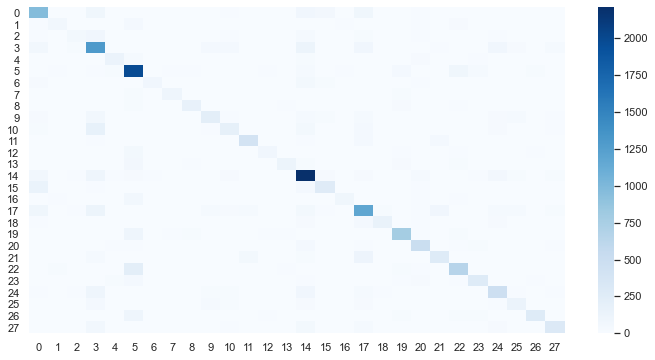

In [23]:
y_pred2=model2.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred2),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred2)*100)

In [24]:
model3=AdaBoostClassifier()
model3.fit(X_train_vect,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Accuracy Score: 45.15848052262279


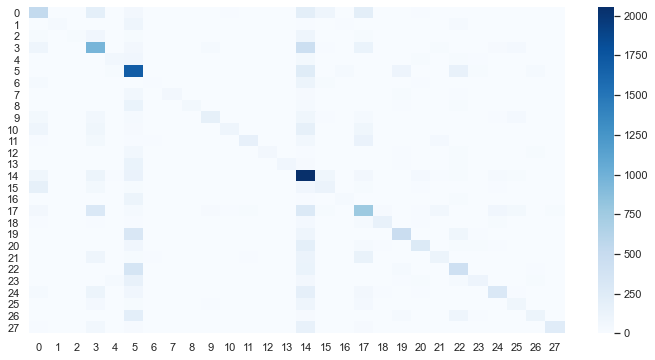

In [25]:
y_pred3=model3.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred3),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred3)*100)

In [26]:
model4=LinearSVC()
model4.fit(X_train_vect,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy Score: 66.93926929591096


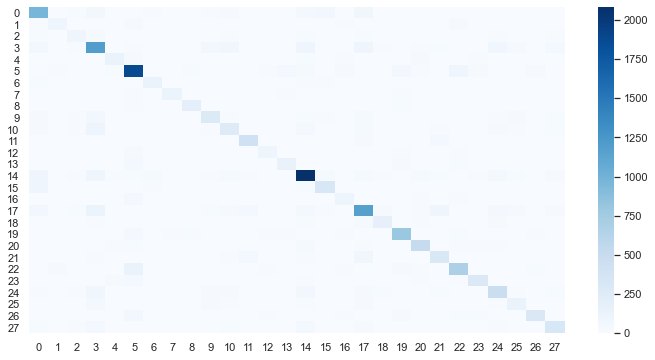

In [27]:
y_pred4=model4.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred4),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred4)*100)

In [28]:
model5=RandomForestClassifier()
model5.fit(X_train_vect,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score: 65.83595451246069


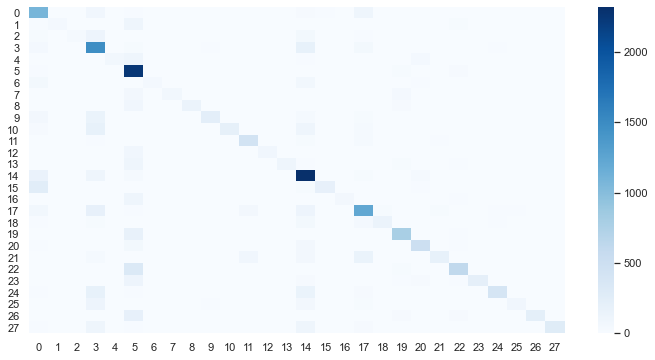

In [29]:
y_pred5=model5.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred5),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred5)*100)

In [30]:
model6=BaggingClassifier()
model6.fit(X_train_vect,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

Accuracy Score: 62.40503266392451


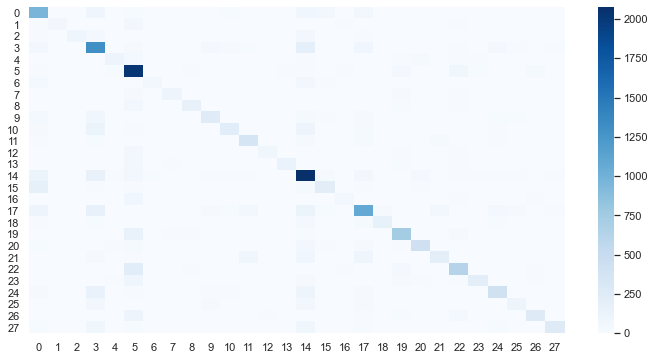

In [31]:
y_pred6=model6.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred6),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred6)*100)

In [32]:
model7=SVC()
model7.fit(X_train_vect,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy Score: 70.0701669489475


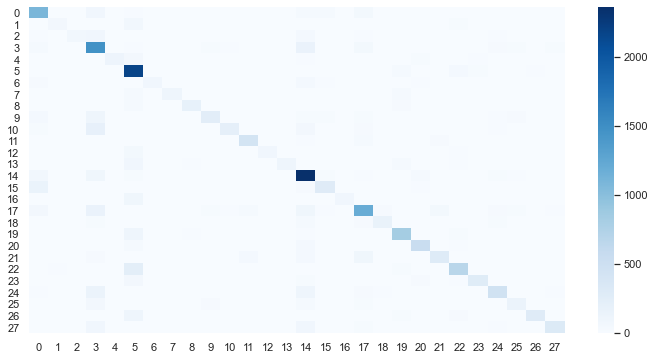

In [33]:
y_pred7=model7.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred7),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred7)*100)

In [34]:
model8=RidgeClassifier()
model8.fit(X_train_vect,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

Accuracy Score: 65.04234212436486


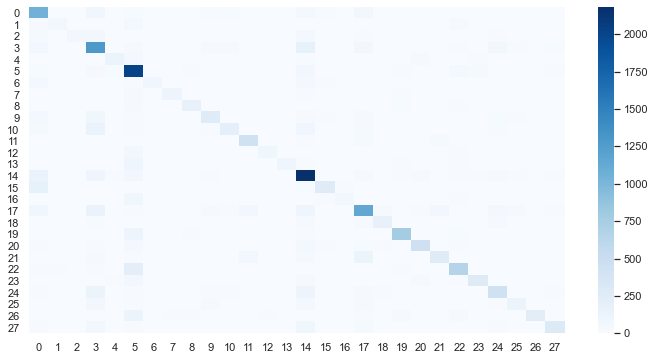

In [35]:
y_pred8=model8.predict(X_test_vect)
plt.figure(figsize=(12,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred8),cmap="Blues")
print("Accuracy Score:",accuracy_score(y_test,y_pred8)*100)